In [370]:
import pandas as pd 
import numpy as np
import os 
from datetime import datetime, time, date
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import HTML
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
*The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

from IPython.display import display, HTML

In [159]:
graph = pd.read_csv('sprint_dummies')
sprint= pd.read_csv('sprint')

/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.



In [160]:
index =[ i for i in graph[graph['bike_m']>100]['bike_m'].index]

In [161]:
graph= graph.drop(index)

In [162]:
for n in ['swim','t1','bike','t2','run','total_time']:
    graph[n] = pd.to_timedelta(graph[n])

In [163]:
graph['swim_m']= graph['swim']/pd.Timedelta(minutes=1)

In [164]:
# graph.total_time.groupby

In [165]:
b= [i for i in graph[graph['bike_m']>120].index]

In [166]:
graph= graph.drop(b)

In [167]:
graph = graph[graph['total_tran']<10]

In [168]:
graph =graph[graph['bike_m']<120]

In [169]:
# for n in ['swim','t1','bike','t2','run']:
#     total_averages[n] = pd.to_timedelta(total_averages[n])
    
for n in ['swim','t1','bike','t2','run']:
    df[n] = pd.to_timedelta(df[n])
#     for n in ['Swim','Bike','Run','Finish','T total']:
#     df[n] = pd.to_timedelta(df[n])

In [170]:
# for n in ['swim','t1','bike','t2','run']:
#     df[n] = df[n].astype(float)

In [171]:
# df.columns

In [215]:
# graph.columns

In [173]:
df= graph

In [174]:
df['swim'] =df['swim']/pd.Timedelta(minutes=1)

In [175]:
df['run'] =df['run']/pd.Timedelta(minutes=1)
df['bike'] =df['bike']/pd.Timedelta(minutes=1)
df['t1']=df['t1']/pd.Timedelta(seconds=1)
df['t2']=df['t2']/pd.Timedelta(seconds=1)

In [176]:
sa=df.swim.groupby(df.event_id).mean()
ba=df.bike.groupby(df.event_id).mean()
ra=df.run.groupby(df.event_id).mean()
t1=df.t1.groupby(df.event_id).mean()
t2=df.t2.groupby(df.event_id).mean()

In [177]:
sa= pd.DataFrame(sa)
ba= pd.DataFrame(ba)
ra= pd.DataFrame(ra)
t1= pd.DataFrame(t1)
t2= pd.DataFrame(t2)

In [178]:
df_average=sa.merge(ba,on='event_id')

In [179]:
df_average=df_average.merge(ba,on='event_id')

In [180]:
df_average=df_average.merge(ra,on='event_id')

In [181]:
df_average=df_average.merge(t1,on='event_id')
df_average=df_average.merge(t2,on='event_id')

In [202]:
graph = graph[graph['run_m']>20]

In [64]:
# df_average[df_average['event_country']=='Zimbabwe']

In [115]:
# country = df_average['event_country'].values 

In [186]:
total_location= df[['event_id','event_country','event_latitude','event_longitude']]

In [187]:
df_average= df_average.merge(total_location, on='event_id')

In [188]:
df_average= df_average.drop([6186,6187,6188,6189])

In [189]:
df_average=df_average.drop_duplicates()

In [190]:
df_average=df_average.drop('bike_x',axis=1)

In [191]:
lat=[i for i in df_average['event_latitude']]
long= [i for i in df_average['event_longitude']]
countries= [i for i in df_average['event_country'] ]

In [206]:
graph= graph[graph['total']>50]

In [263]:
graph = graph.rename(index=str, columns={"total": "Time", "bike_m": "Bike", "swim_m":"Swim", "run_m":"Run",'age':'Age'})

In [364]:
# graph

# <h1><center>Triathlon</center></h1>
   <h2> 
   * Project Overview 
   * Analysis of triathlon races from 92 countries 
   * Impact of age, gender on race time and segments 
   * Regression to predict finishing time of an Athlete
   * Next steps 
   <h2> 
   
   <h2><center>Swim.Bike.Run</center></h2>
   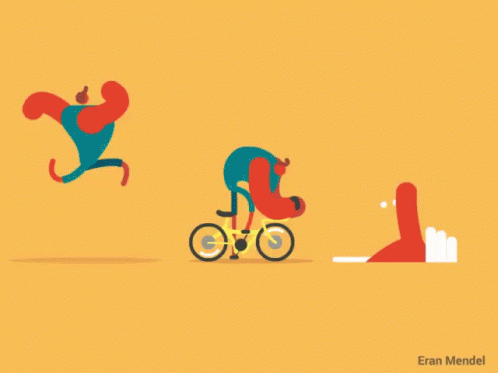
   

#<h1><center>Map of Races</center></h1>


In [333]:


import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


plotly.tools.set_credentials_file(username='jarty', api_key='18ZbhgfKR1l3QBtvjZmO')
mapbox_access_token = 'pk.eyJ1IjoiamFydHkxMyIsImEiOiJjam1xcnVsNjUxdGF5M3dueWgwdGh5ZTNsIn0.Ppjxs4B6GU0ia2d9Uo78hg'

data = [
    go.Scattermapbox(
        lat=lat,
        lon=long,
        mode='markers',
        marker=dict(
            size=9
        ),
        text=countries
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38.92,
            lon=-77.07
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')


 # <h1><center>Time By Gender and Age </center></h1>

In [366]:

def f(z):
    x = graph[z][graph['athlete_gender'] == 'male']
    y = graph[z][graph['athlete_gender'] == 'female']

    # bins = np.linspace(2, 5, 15)
    plt.hist([x, y], label=('M','F'))

    plt.xlabel('Total time'+ str(z), fontsize = 13, color = "Black")
    plt.ylabel('Number of finishers', fontsize = 13, color = "Black")
    plt.title('Total ' + str(z) +' Distribution by Gender', fontsize = 16, color = "Black")
    plt.legend(loc=2, fontsize = 10)
    sns.despine(offset=9, trim=True)
    plt.grid(False)
    plt.tick_params(axis='y', which='both', bottom='off', top='off', labelbottom='off')
    plt.xticks(fontsize = 12, color = "Black")
    plt.show()
    
#     display(HTML("""
#     <style>
#     .output {
#         align-items: center;
#         width=30%
#     }
#     </style>
#     """))
#     return z


# from ipywidgets import Layout
# items_layout = Layout( width='100%', justify_content='space-around')


interact_widget = interact(f, z=['Time', 'Age'], layout=items_layout)

interactive(children=(Dropdown(description='z', options=('Time', 'Age'), value='Time'), Output()), _dom_classe…

# <h1><center>Triathlon by Gender</center></h1>

In [322]:
def f(x):
    fig, ax = plt.subplots(figsize = (5,5))
    chart = sns.boxplot(x='athlete_gender',y=x, data=graph, ax = ax)
    plt.xticks(rotation = 90)
    plt.show()
    return x

interact(f, x=['Time', 'Swim', 'Bike','Run'])

interactive(children=(Dropdown(description='x', options=('Time', 'Swim', 'Bike', 'Run'), value='Time'), Output…

<function __main__.f(x)>

# <h1><center>Scatter Plot of Segments</center></h1>

In [268]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np



trace0 = go.Scatter(
    x = graph['Swim'],
    y =graph['Time'],
    name = 'Swim time',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = graph['Bike'],
    y =graph['Time'],
    name = 'Bike time',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)
trace2 = go.Scatter(
    x = graph['Run'],
    y =graph['Time'],
    name = 'Run Time',
    mode = 'markers',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
        )
    )
)
data = [trace0, trace1,trace2]

layout = dict(title = 'Styled Scatter',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [109]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import numpy as np

# trace0 = go.Scatter(
#     x = graph['swim_m'],
#     y =graph['total'],
#     name = 'Swim time',
#     mode = 'markers',
# y0 = graph[]
# y1 = np.random.randn(50)+1

# trace0 = go.Box(
#     y=y0
# )
# trace1 = go.Box(
#     y=y1
# )
# data = [trace0, trace1]
# py.iplot(data)

# <h1><center>Triathlon Distribtuion by Age</center></h1>


In [368]:

def f(x):
    fig, ax = plt.subplots(figsize  = (20,7))
    chart = sns.boxplot(x='Age' ,y=x, data=graph, ax = ax)
    plt.xticks(rotation = 90)
    plt.show()
    return x

interact(f, x=['Time', 'Swim', 'Bike','Run'])


# ##distribution of points by state
# fig, ax = plt.subplots(figsize  = (20,7))
# chart = sns.boxplot(x='age',y='total', data=graph, ax = ax)
# plt.xticks(rotation = 90)
# plt.show()

interactive(children=(Dropdown(description='x', options=('Time', 'Swim', 'Bike', 'Run'), value='Time'), Output…

<function __main__.f(x)>

<!-- <h1><center>Swim Result by Age</center></h1> -->


<!-- <h1><center>Bike Results by Age</center></h1> -->


 <h1><center>Total Result by Country</center></h1>


In [271]:
def f(x):
    fig, ax = plt.subplots(figsize  = (20,7))
    chart = sns.boxplot(x='event_country' ,y=x, data=graph, ax = ax)
    plt.xticks(rotation = 90)
    plt.show()
    return x

interact(f, x=['Time', 'Swim', 'Bike','Run'])

# fig, ax = plt.subplots(figsize = (20,7))
# chart = sns.boxplot(x='event_country',y='total', data=graph, ax = ax)
# plt.xticks(rotation = 90)
# plt.show()

interactive(children=(Dropdown(description='x', options=('Time', 'Swim', 'Bike', 'Run'), value='Time'), Output…

<function __main__.f(x)>